#Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Uploading the file

In [3]:
from google.colab import files
uploaded=files.upload()

Saving hypertension_dataset.csv to hypertension_dataset.csv


#Initial Data Exploration

In [4]:
dataset=pd.read_csv("hypertension_dataset.csv")
print(dataset.shape)
print(dataset.head(5))
print(dataset.dtypes)
print(dataset.isnull().sum())
print(dataset.describe(include="all"))

(1985, 11)
   Age  Salt_Intake  Stress_Score       BP_History  Sleep_Duration   BMI  \
0   69          8.0             9           Normal             6.4  25.8   
1   32         11.7            10           Normal             5.4  23.4   
2   78          9.5             3           Normal             7.1  18.7   
3   38         10.0            10     Hypertension             4.2  22.1   
4   41          9.8             1  Prehypertension             5.8  16.2   

      Medication Family_History Exercise_Level Smoking_Status Has_Hypertension  
0            NaN            Yes            Low     Non-Smoker              Yes  
1            NaN             No            Low     Non-Smoker               No  
2            NaN             No       Moderate     Non-Smoker               No  
3  ACE Inhibitor             No            Low     Non-Smoker              Yes  
4          Other             No       Moderate     Non-Smoker               No  
Age                   int64
Salt_Intake       

#Encoding the Target(Output)

In [5]:
dataset['Binary_encoding']=dataset['Has_Hypertension'].map({"Yes":1,"No":0})
print(dataset["Binary_encoding"].head(5))

0    1
1    0
2    0
3    1
4    0
Name: Binary_encoding, dtype: int64


#Hypertension Class Distribution

/tmp/ipython-input-6-1668409255.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(data=dataset,x="Has_Hypertension",palette='Set1')


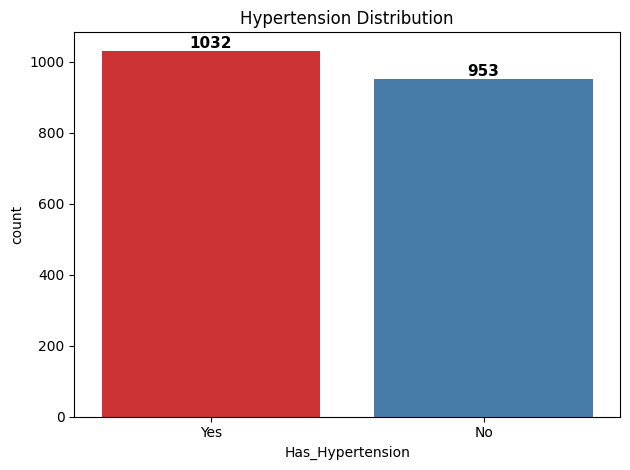

In [6]:
ax=sns.countplot(data=dataset,x="Has_Hypertension",palette='Set1')
plt.title("Hypertension Distribution")
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

#Distribution of Numerical Features

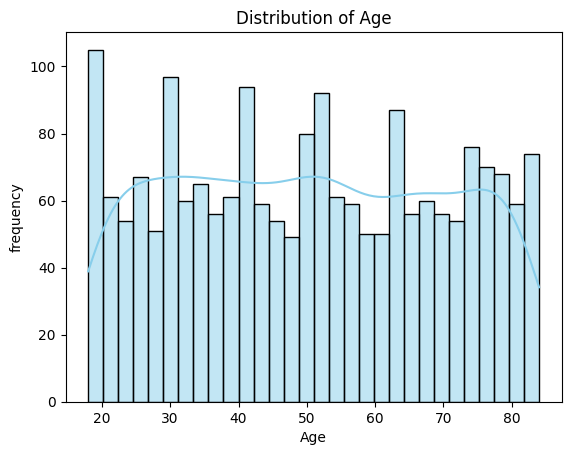

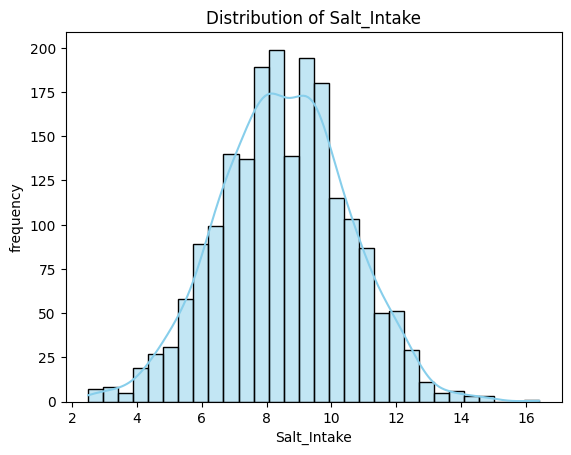

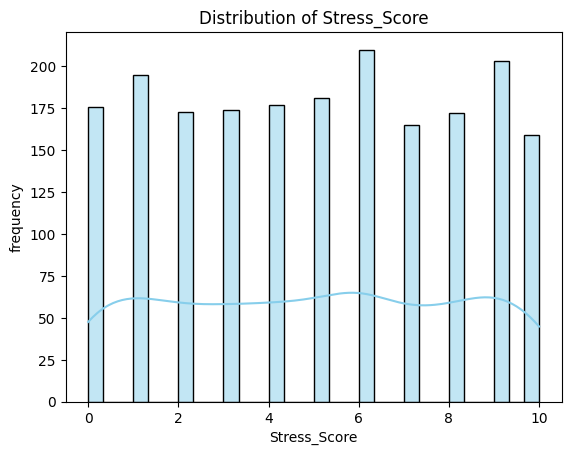

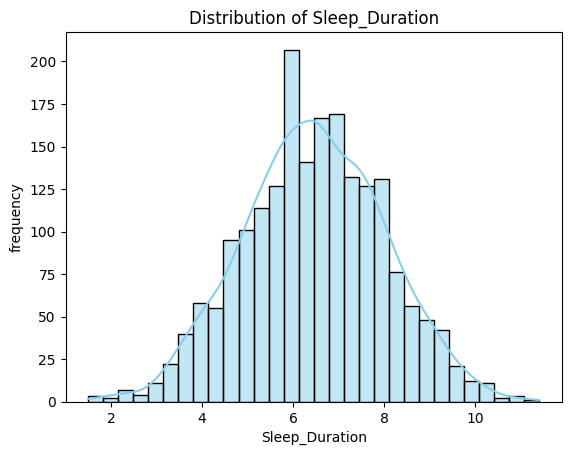

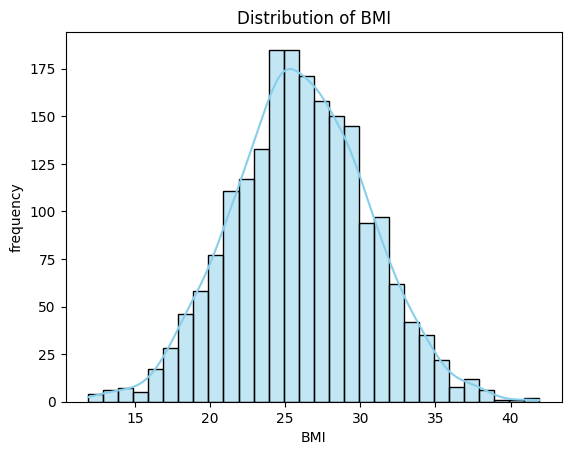

In [7]:
num_cols=['Age', 'Salt_Intake', 'Stress_Score', 'Sleep_Duration', 'BMI']

for col in num_cols:
  sns.histplot(dataset[col],bins=30,kde=True,color='skyblue')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel("frequency")
  plt.show()

#Correlation Analysis with Hypertension


🔹 Correlation with Hypertension:
 Binary_encoding    1.000000
Age                0.210677
Stress_Score       0.186910
BMI                0.145093
Salt_Intake        0.114415
Sleep_Duration    -0.119561
Name: Binary_encoding, dtype: float64


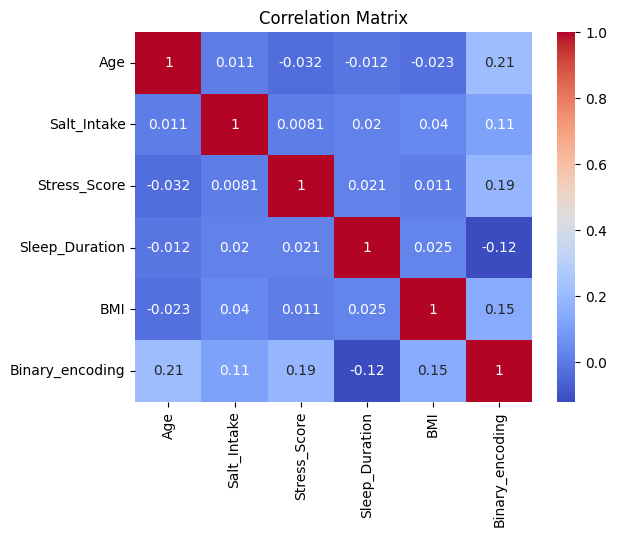

In [8]:
corr = dataset[num_cols + ['Binary_encoding']].corr()
print("\n🔹 Correlation with Hypertension:\n", corr['Binary_encoding'].sort_values(ascending=False))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#Box Plot Analysis: Numerical Features vs Hypertension

/tmp/ipython-input-9-4060241523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Has_Hypertension', y=col, palette='Pastel1')


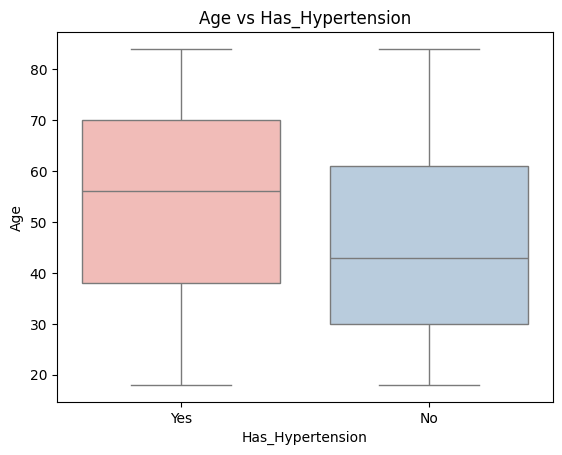

/tmp/ipython-input-9-4060241523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Has_Hypertension', y=col, palette='Pastel1')


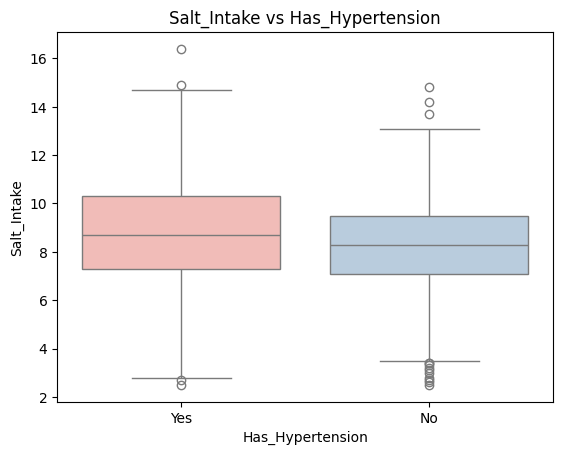

/tmp/ipython-input-9-4060241523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Has_Hypertension', y=col, palette='Pastel1')


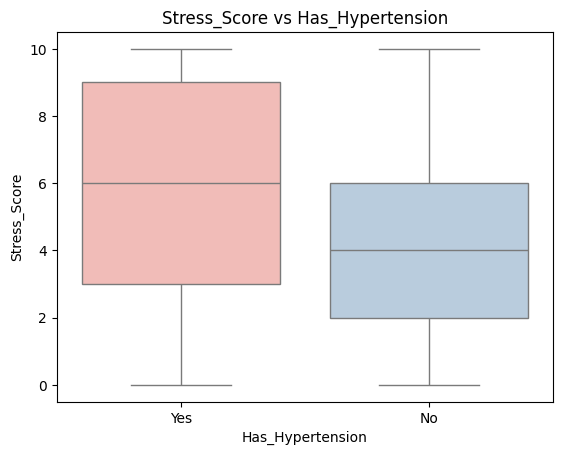

/tmp/ipython-input-9-4060241523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Has_Hypertension', y=col, palette='Pastel1')


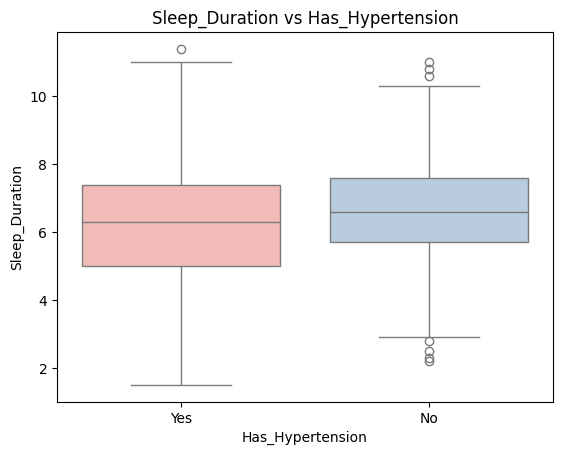

/tmp/ipython-input-9-4060241523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Has_Hypertension', y=col, palette='Pastel1')


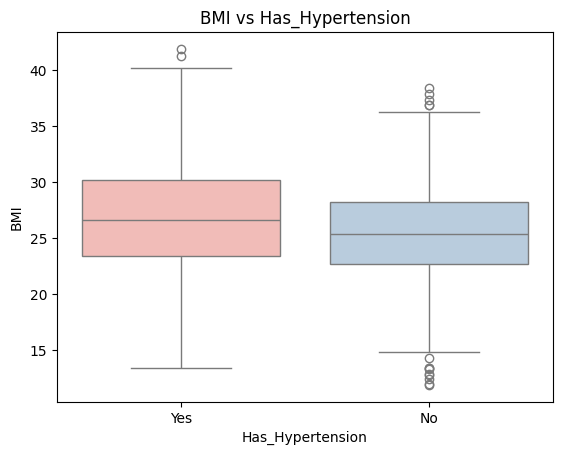

In [9]:
for col in num_cols:
    sns.boxplot(data=dataset, x='Has_Hypertension', y=col, palette='Pastel1')
    plt.title(f'{col} vs Has_Hypertension')
    plt.show()

#Distribution of Categorical Features

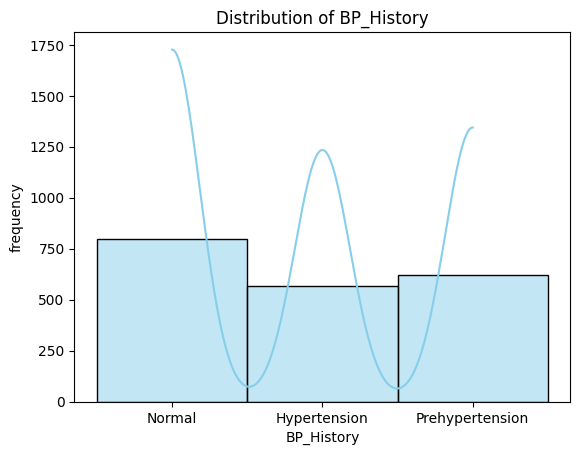

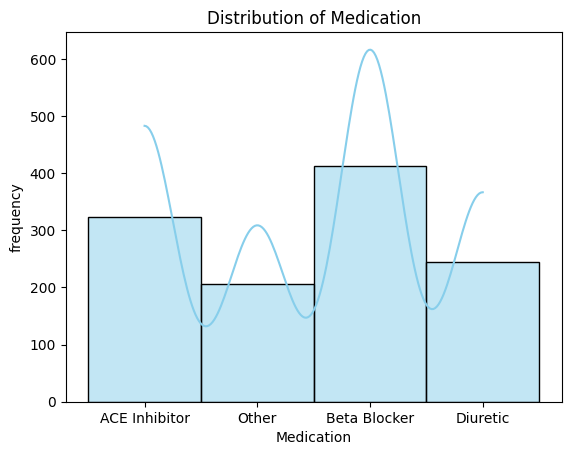

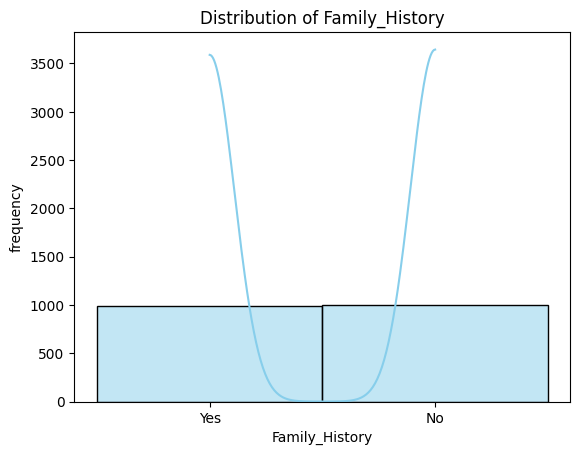

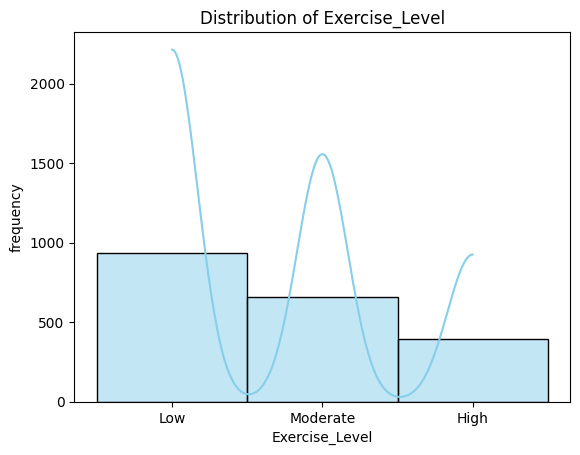

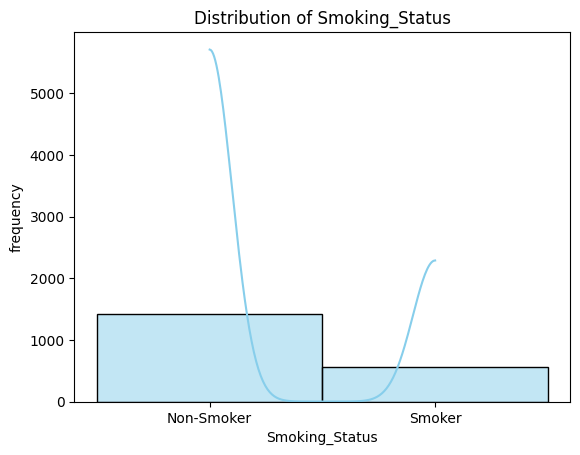

In [10]:
cat_cols = ['BP_History', 'Medication', 'Family_History', 'Exercise_Level', 'Smoking_Status']
for col in cat_cols:
  sns.histplot(dataset[col],bins=30,kde=True,color='skyblue')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel("frequency")
  plt.show()

#BMI Comparison by Hypertension Status

/tmp/ipython-input-11-3753236302.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Has_Hypertension', y='BMI', palette='Set2')


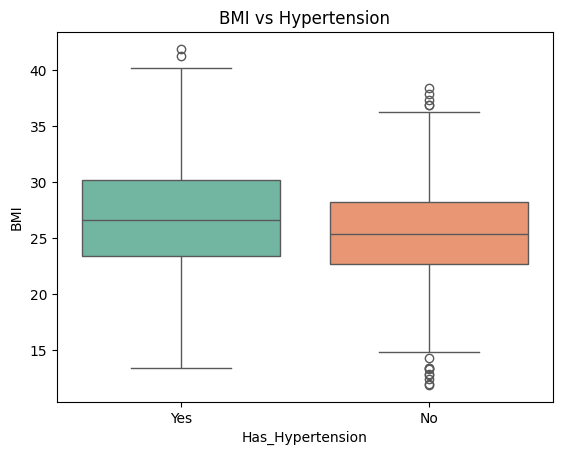

In [11]:
sns.boxplot(data=dataset, x='Has_Hypertension', y='BMI', palette='Set2')
plt.title("BMI vs Hypertension")
plt.show()

#Sleep Duration vs Hypertension

/tmp/ipython-input-12-1675753859.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Has_Hypertension', y='Sleep_Duration', palette='Set3')


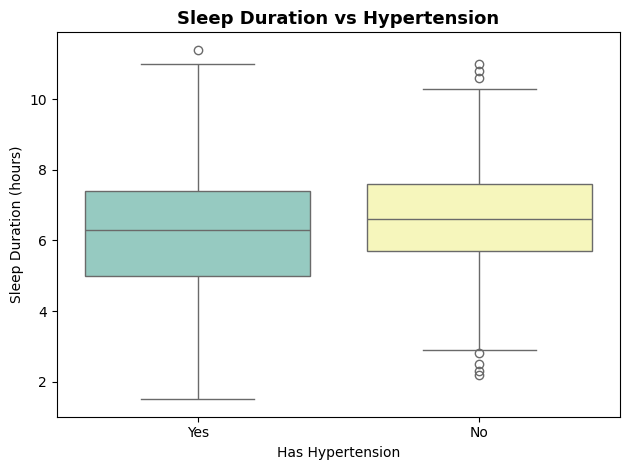

In [12]:
sns.boxplot(data=dataset, x='Has_Hypertension', y='Sleep_Duration', palette='Set3')
plt.title("Sleep Duration vs Hypertension", fontsize=13, fontweight='bold')
plt.xlabel("Has Hypertension")
plt.ylabel("Sleep Duration (hours)")
plt.tight_layout()
plt.show()

#Smoking Status by Hypertension

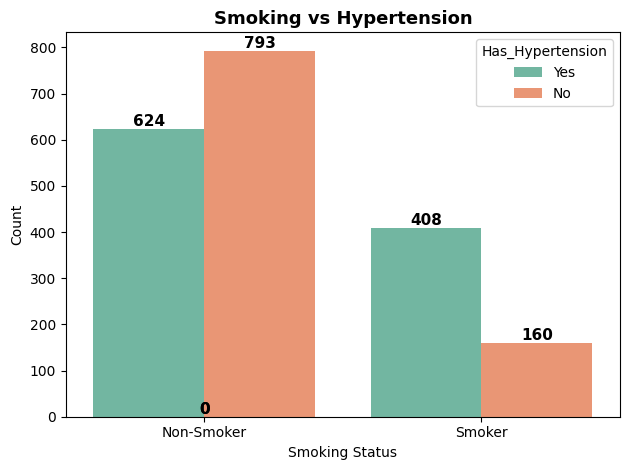

In [14]:
ex = sns.countplot(data=dataset, x='Smoking_Status', hue='Has_Hypertension', palette='Set2')
plt.title("Smoking vs Hypertension", fontsize=13, fontweight='bold')
plt.xlabel("Smoking Status")
plt.ylabel("Count")
for p in ex.patches:
    count = int(p.get_height())
    ex.annotate(f'{count}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

#Salt Intake vs Hypertension

/tmp/ipython-input-15-1934256536.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Has_Hypertension', y='Salt_Intake', palette='flare')


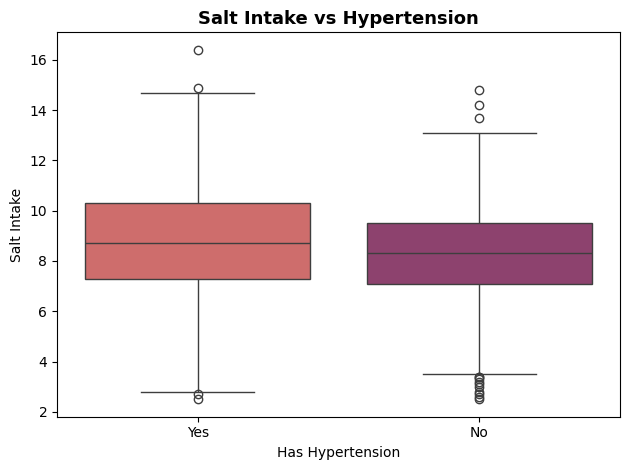

In [15]:
sns.boxplot(data=dataset, x='Has_Hypertension', y='Salt_Intake', palette='flare')
plt.title("Salt Intake vs Hypertension", fontsize=13, fontweight='bold')
plt.xlabel("Has Hypertension")
plt.ylabel("Salt Intake")
plt.tight_layout()
plt.show()

#Stress Score vs Hypertension

/tmp/ipython-input-16-1255499998.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='Has_Hypertension', y='Stress_Score', palette='mako')


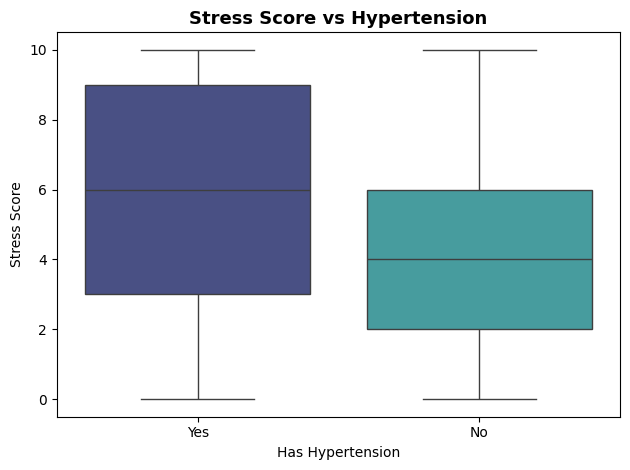

In [16]:
sns.boxplot(data=dataset, x='Has_Hypertension', y='Stress_Score', palette='mako')
plt.title("Stress Score vs Hypertension", fontsize=13, fontweight='bold')
plt.xlabel("Has Hypertension")
plt.ylabel("Stress Score")
plt.tight_layout()
plt.show()

#Feature Importance using Random Forest

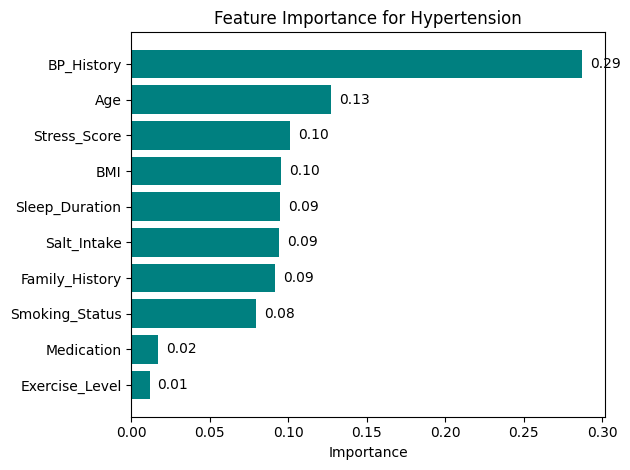

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
df_model = dataset.copy()

# Encode categorical variables
for col in df_model.select_dtypes(include='object'):
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

# Define features and target
X = df_model.drop(['Has_Hypertension', 'Binary_encoding'], axis=1)
y = df_model['Binary_encoding']

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Plot feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values()

# Plot and capture the bars
bars = plt.barh(importances_sorted.index, importances_sorted.values, color='teal')
plt.title("Feature Importance for Hypertension")
plt.xlabel("Importance")

# Add value labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.005, bar.get_y() + bar.get_height() / 2,
             f'{width:.2f}', va='center')

plt.tight_layout()
plt.show()

